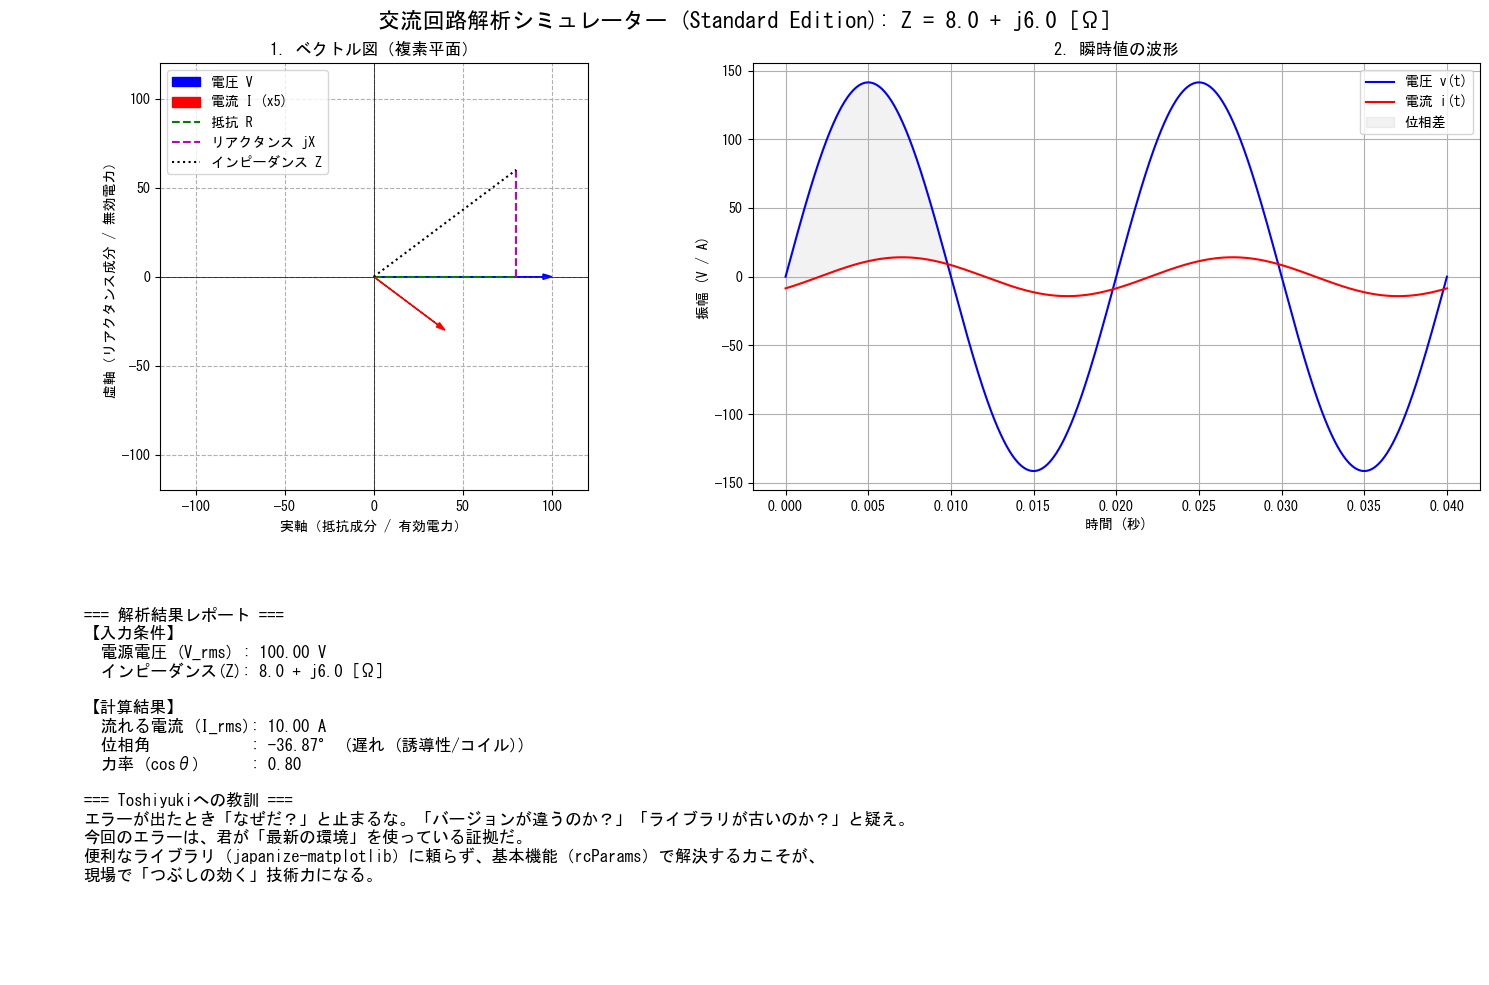

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# ==========================================
# 【重要】日本語化の「直輸入」設定
# ライブラリに頼らず、Windows標準フォントを直接指定する
# ==========================================
plt.rcParams['font.family'] = 'MS Gothic' # Windowsの標準フォント

# ==========================================
# 設定：ここをいじって「実験」せよ
# ==========================================
V_rms = 100  # 電圧(V)
R = 8.0      # 抵抗(Ω)
X = 6.0      # リアクタンス(Ω) 
f = 50       # 周波数(Hz)

# ==========================================
# 計算ロジック
# ==========================================
Z = R + 1j * X
V_complex = V_rms + 0j
I_complex = V_complex / Z

I_rms = abs(I_complex)
theta_rad = np.angle(I_complex)
theta_deg = np.degrees(theta_rad)
power_factor = np.cos(theta_rad)

# ==========================================
# 描画ロジック
# ==========================================
t = np.linspace(0, 2/f, 1000)
omega = 2 * np.pi * f

v_t = V_rms * np.sqrt(2) * np.sin(omega * t)
i_t = I_rms * np.sqrt(2) * np.sin(omega * t + theta_rad)

fig = plt.figure(figsize=(15, 10))
fig.suptitle(f'交流回路解析シミュレーター (Standard Edition): Z = {R} + j{X} [Ω]', fontsize=16, fontweight='bold')
gs = GridSpec(2, 2, figure=fig)

# --- 1. ベクトル図 ---
ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("1. ベクトル図（複素平面）")
ax1.set_xlabel("実軸（抵抗成分 / 有効電力）")
ax1.set_ylabel("虚軸（リアクタンス成分 / 無効電力）")
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.grid(True, which='both', linestyle='--')

ax1.arrow(0, 0, V_complex.real, V_complex.imag, head_width=3, head_length=5, fc='blue', ec='blue', label='電圧 V', length_includes_head=True)
ax1.arrow(0, 0, I_complex.real*5, I_complex.imag*5, head_width=3, head_length=5, fc='red', ec='red', label='電流 I (x5)', length_includes_head=True)

ax1.plot([0, R*10], [0, 0], 'g--', label='抵抗 R')
ax1.plot([R*10, R*10], [0, X*10], 'm--', label='リアクタンス jX')
ax1.plot([0, R*10], [0, X*10], 'k:', label='インピーダンス Z')

ax1.legend()
limit = max(V_rms, I_rms*5) * 1.2
ax1.set_xlim(-limit, limit)
ax1.set_ylim(-limit, limit)
ax1.set_aspect('equal')

# --- 2. 時間波形 ---
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("2. 瞬時値の波形")
ax2.set_xlabel("時間 (秒)")
ax2.set_ylabel("振幅 (V / A)")
ax2.grid(True)

ax2.plot(t, v_t, 'b', label='電圧 v(t)')
ax2.plot(t, i_t, 'r', label='電流 i(t)')
ax2.fill_between(t, v_t, i_t, where=(t>=0) & (t<=1/(2*f)), color='gray', alpha=0.1, label='位相差')
ax2.legend(loc='upper right')

# --- 3. 解析結果 ---
ax3 = fig.add_subplot(gs[1, :])
ax3.axis('off')

status = "遅れ (誘導性/コイル)" if X > 0 else "進み (容量性/コンデンサ)" if X < 0 else "同相 (抵抗のみ)"

text_content = f"""
=== 解析結果レポート ===
【入力条件】
  電源電圧 (V_rms) : {V_rms:.2f} V
  インピーダンス(Z): {R} + j{X} [Ω]

【計算結果】
  流れる電流 (I_rms): {I_rms:.2f} A
  位相角            : {theta_deg:.2f}° ({status})
  力率 (cosθ)      : {power_factor:.2f}

=== Toshiyukiへの教訓 ===
エラーが出たとき「なぜだ？」と止まるな。「バージョンが違うのか？」「ライブラリが古いのか？」と疑え。
今回のエラーは、君が「最新の環境」を使っている証拠だ。
便利なライブラリ（japanize-matplotlib）に頼らず、基本機能（rcParams）で解決する力こそが、
現場で「つぶしの効く」技術力になる。
"""
ax3.text(0.05, 0.9, text_content, fontsize=12, family='MS Gothic', verticalalignment='top') # フォント指定を念のためここにも

plt.tight_layout()
plt.show()

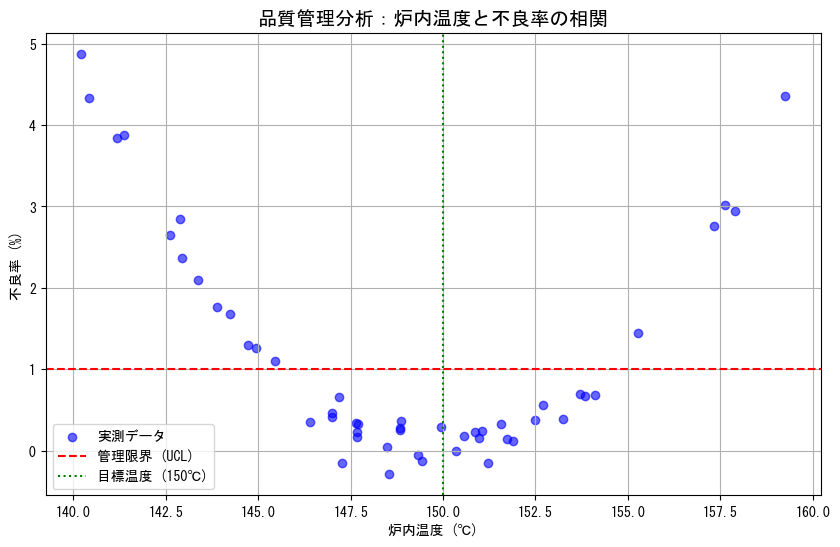

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 1. データ準備（本来はExcelから読み込むが、ここではダミーデータを作る）
# 例：炉の温度(X)と、製品の不良率(Y)の関係
np.random.seed(42)
temperature = np.random.normal(150, 5, 50)  # 平均150℃、ばらつき5℃のデータ50個
defect_rate = (temperature - 150) ** 2 * 0.05 + np.random.normal(0, 0.2, 50) # 温度が適正(150)から外れると不良が増える

# 2. グラフ描画（さっきと同じ「MS Gothic」指定）
plt.rcParams['font.family'] = 'MS Gothic'
plt.figure(figsize=(10, 6))

# 散布図 (scatter)
plt.scatter(temperature, defect_rate, color='blue', alpha=0.6, label='実測データ')

# 管理基準線 (例：不良率 1.0%以下が合格)
plt.axhline(y=1.0, color='red', linestyle='--', label='管理限界 (UCL)')
plt.axvline(x=150, color='green', linestyle=':', label='目標温度 (150℃)')

# 装飾
plt.title("品質管理分析：炉内温度と不良率の相関", fontsize=14)
plt.xlabel("炉内温度 (℃)")
plt.ylabel("不良率 (%)")
plt.grid(True)
plt.legend()

plt.show()